<a href="https://colab.research.google.com/github/vanessabrolim/comfort_analysis/blob/master/descritive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação das libs

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from geopy.distance import vincenty
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Carregamento dos arquivos de trajetórias

In [0]:
f15 = pd.read_csv('drive/My Drive/Udesc/periodo/15.tsv', sep='\t', low_memory = False)
f16 = pd.read_csv('drive/My Drive/Udesc/periodo/16.tsv', sep='\t', low_memory = False)
f17 = pd.read_csv('drive/My Drive/Udesc/periodo/17.tsv', sep='\t', low_memory = False)
f18 = pd.read_csv('drive/My Drive/Udesc/periodo/18.tsv', sep='\t', low_memory = False)
f19 = pd.read_csv('drive/My Drive/Udesc/periodo/19.tsv', sep='\t', low_memory = False)
f20 = pd.read_csv('drive/My Drive/Udesc/periodo/20.tsv', sep='\t', low_memory = False)
f22 = pd.read_csv('drive/My Drive/Udesc/periodo/22.tsv', sep='\t', low_memory = False)
f23 = pd.read_csv('drive/My Drive/Udesc/periodo/23.tsv', sep='\t', low_memory = False)
f24 = pd.read_csv('drive/My Drive/Udesc/periodo/24.tsv', sep='\t', low_memory = False)
f25 = pd.read_csv('drive/My Drive/Udesc/periodo/25.tsv', sep='\t', low_memory = False)

In [0]:
# f15.to_pickle("./f15.pkl")
# f16.to_pickle("./f16.pkl")
# f17.to_pickle("./f17.pkl")
# f18.to_pickle("./f18.pkl")
# f19.to_pickle("./f19.pkl")
# f20.to_pickle("./f20.pkl")
# f22.to_pickle("./f22.pkl")
# f23.to_pickle("./f23.pkl")
# f24.to_pickle("./f24.pkl")
# f25.to_pickle("./f25.pkl")


In [0]:
# f152 = pd.read_pickle("./f16.pkl")

In [0]:
 f15.head()

,MILLIS,DATE_TIME,UNIX_TIMESTAMP,TIME_OF_DAY,LATITUDE,LONGITUDE,ALTITUDE,SPEED,SPEED_AVG,SPEED_STD,...,DISC_FUNCIONAMENTO,DISC_RPM,DISC_CARGA,DISC_TEMPERATURA_REFRIGERANTE,DISC_PRESSAO_COLETOR,DISC_PEDAL,DISC_CONSUMO,DISC_ACELEROMETRO_X,DISC_ACELEROMETRO_Y,DISC_ACELEROMETRO_Z
0,36003915,2017-09-15T00:20:27.802Z,1.505435e+12,0.340833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
1,36004415,2017-09-15T00:20:28.302Z,1.505435e+12,0.341111,-26.272034,-48.850364,NaN,0.127404,0.1400,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
2,36004915,2017-09-15T00:20:28.802Z,1.505435e+12,0.341111,-26.272033,-48.850365,5.948690,0.061108,0.1400,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
3,36005415,2017-09-15T00:20:29.302Z,1.505435e+12,0.341389,-26.272033,-48.850366,5.999093,0.009961,0.0745,0.0655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
4,36005915,2017-09-15T00:20:29.802Z,1.505435e+12,0.341389,-26.272033,-48.850367,6.000000,0.014452,0.0745,0.0655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra


In [0]:
f16.head()

,MILLIS,DATE_TIME,UNIX_TIMESTAMP,TIME_OF_DAY,LATITUDE,LONGITUDE,ALTITUDE,SPEED,SPEED_AVG,SPEED_STD,...,DISC_FUNCIONAMENTO,DISC_RPM,DISC_CARGA,DISC_TEMPERATURA_REFRIGERANTE,DISC_PRESSAO_COLETOR,DISC_PEDAL,DISC_CONSUMO,DISC_ACELEROMETRO_X,DISC_ACELEROMETRO_Y,DISC_ACELEROMETRO_Z
0,126006422,2017-09-16T01:20:30.496Z,1.505525e+12,1.341667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
1,126006922,2017-09-16T01:20:30.996Z,1.505525e+12,1.341667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
2,126007422,2017-09-16T01:20:31.496Z,1.505525e+12,1.341944,-26.268193,-48.848638,-6.719081,0.290846,0.3250,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
3,126007922,2017-09-16T01:20:31.996Z,1.505525e+12,1.341944,-26.268193,-48.848637,-6.769031,0.235402,0.3250,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
4,126008422,2017-09-16T01:20:32.496Z,1.505525e+12,1.342222,-26.268193,-48.848636,-6.800000,0.234693,0.2695,0.0555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra


In [0]:
todos = [f15, f16, f17, f18, f19, f20, f22, f23, f24, f25]
ftudo = pd.concat(todos)


In [0]:
ftudo.head()

,MILLIS,DATE_TIME,UNIX_TIMESTAMP,TIME_OF_DAY,LATITUDE,LONGITUDE,ALTITUDE,SPEED,SPEED_AVG,SPEED_STD,...,DISC_FUNCIONAMENTO,DISC_RPM,DISC_CARGA,DISC_TEMPERATURA_REFRIGERANTE,DISC_PRESSAO_COLETOR,DISC_PEDAL,DISC_CONSUMO,DISC_ACELEROMETRO_X,DISC_ACELEROMETRO_Y,DISC_ACELEROMETRO_Z
0,36003915,2017-09-15T00:20:27.802Z,1.505435e+12,0.340833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
1,36004415,2017-09-15T00:20:28.302Z,1.505435e+12,0.341111,-26.272034,-48.850364,NaN,0.127404,0.1400,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
2,36004915,2017-09-15T00:20:28.802Z,1.505435e+12,0.341111,-26.272033,-48.850365,5.948690,0.061108,0.1400,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
3,36005415,2017-09-15T00:20:29.302Z,1.505435e+12,0.341389,-26.272033,-48.850366,5.999093,0.009961,0.0745,0.0655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra
4,36005915,2017-09-15T00:20:29.802Z,1.505435e+12,0.341389,-26.272033,-48.850367,6.000000,0.014452,0.0745,0.0655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaminhoReto,CaminhoLiso,AceleracaoNeutra


In [0]:
ftudo['DATE_TIME'] = pd.to_datetime(ftudo['DATE_TIME'])

In [0]:
list(ftudo)

['MILLIS',
 'DATE_TIME',
 'UNIX_TIMESTAMP',
 'TIME_OF_DAY',
 'LATITUDE',
 'LONGITUDE',
 'ALTITUDE',
 'SPEED',
 'SPEED_AVG',
 'SPEED_STD',
 'SPEED_CRUISE',
 'SPEED_CHANGE',
 'DISTANCE',
 'FIX_QUALITY',
 'PRN',
 'PDOP',
 'HDOP',
 'VDOP',
 'MIL_STATUS',
 'OBD_STANDARD',
 'TROUBLE_CODES_COUNT',
 'ENGINE_RUN_TIME',
 'BATTERY_VOLTAGE',
 'VEHICLE_SPEED',
 'ENGINE_RPM',
 'ENGINE_LOAD',
 'COLANT_TEMPERATURE',
 'ENGINE_THROTTLE',
 'INTAKE_MANIFOLD_PRESSURE',
 'INTAKE_AIR_TEMPERATURE',
 'ACCELERATOR_PEDAL_D',
 'FUEL_RATE',
 'FUEL_PER_SPEED_RATE',
 'ACCELEROMETER_X_SHORT_AVG',
 'ACCELEROMETER_Y_SHORT_AVG',
 'ACCELEROMETER_Z_SHORT_AVG',
 'ACCELEROMETER_X_LONG_AVG',
 'ACCELEROMETER_Y_LONG_AVG',
 'ACCELEROMETER_Z_LONG_AVG',
 'ACCELEROMETER_X_LONG_STD',
 'ACCELEROMETER_Y_LONG_STD',
 'ACCELEROMETER_Z_LONG_STD',
 'ACCELEROMETER_X_OFFSET',
 'ACCELEROMETER_Y_OFFSET',
 'ACCELEROMETER_Z_OFFSET',
 'ACCELEROMETER_X_CENTERED',
 'ACCELEROMETER_Y_CENTERED',
 'ACCELEROMETER_Z_CENTERED',
 'ACCELEROMETER_X_RAW',
 '

### Seleção de colunas

In [0]:
df = ftudo[[
    'DATE_TIME',
    'LATITUDE',
    'LONGITUDE',
    'ENGINE_RPM', 
    'ENGINE_LOAD', 
    'INTAKE_MANIFOLD_PRESSURE', 
    'ACCELERATOR_PEDAL_D',
    'SPEED',
    'GYROSCOPE_X_RAW',
    'GYROSCOPE_Y_RAW',
    'GYROSCOPE_Z_RAW',
    'ACCELEROMETER_X_LONG_AVG',
    'ACCELEROMETER_Y_LONG_AVG',
    'ACCELEROMETER_Z_LONG_AVG',
    'ACCELEROMETER_X_LONG_STD',
    'ACCELEROMETER_Y_LONG_STD',
    'ACCELEROMETER_Z_LONG_STD']]

In [0]:
list(df)

['DATE_TIME',
 'LATITUDE',
 'LONGITUDE',
 'ENGINE_RPM',
 'ENGINE_LOAD',
 'INTAKE_MANIFOLD_PRESSURE',
 'ACCELERATOR_PEDAL_D',
 'SPEED',
 'GYROSCOPE_X_RAW',
 'GYROSCOPE_Y_RAW',
 'GYROSCOPE_Z_RAW',
 'ACCELEROMETER_X_LONG_AVG',
 'ACCELEROMETER_Y_LONG_AVG',
 'ACCELEROMETER_Z_LONG_AVG',
 'ACCELEROMETER_X_LONG_STD',
 'ACCELEROMETER_Y_LONG_STD',
 'ACCELEROMETER_Z_LONG_STD']

In [0]:
df.head()

,DATE_TIME,LATITUDE,LONGITUDE,ENGINE_RPM,ENGINE_LOAD,INTAKE_MANIFOLD_PRESSURE,ACCELERATOR_PEDAL_D,SPEED,GYROSCOPE_X_RAW,GYROSCOPE_Y_RAW,GYROSCOPE_Z_RAW,ACCELEROMETER_X_LONG_AVG,ACCELEROMETER_Y_LONG_AVG,ACCELEROMETER_Z_LONG_AVG,ACCELEROMETER_X_LONG_STD,ACCELEROMETER_Y_LONG_STD,ACCELEROMETER_Z_LONG_STD
0,2017-09-15 00:20:27.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.28,-0.26,-2.20,1.026000,0.081000,0.116000,0.000000,0.000000,0.000000
1,2017-09-15 00:20:28.302,-26.272034,-48.850364,NaN,NaN,NaN,NaN,0.127404,-1.29,-0.02,-2.58,1.018600,0.081000,0.115000,0.006020,0.002608,0.001897
2,2017-09-15 00:20:28.802,-26.272033,-48.850365,NaN,NaN,NaN,NaN,0.061108,-1.26,-0.13,-2.30,1.018000,0.080900,0.115500,0.005040,0.002587,0.004177
3,2017-09-15 00:20:29.302,-26.272033,-48.850366,NaN,NaN,NaN,NaN,0.009961,-1.35,-0.24,-2.41,1.017867,0.080333,0.115933,0.004272,0.002821,0.003750
4,2017-09-15 00:20:29.802,-26.272033,-48.850367,NaN,NaN,NaN,NaN,0.014452,-1.22,-0.29,-2.58,1.017500,0.079750,0.115750,0.003814,0.002947,0.003832


In [0]:
df.shape

(1451725, 17)

In [0]:
df.count()

DATE_TIME                   1451725
LATITUDE                    1451711
LONGITUDE                   1451711
ENGINE_RPM                   363510
ENGINE_LOAD                  363712
INTAKE_MANIFOLD_PRESSURE     363421
ACCELERATOR_PEDAL_D          363820
SPEED                       1451711
GYROSCOPE_X_RAW             1451719
GYROSCOPE_Y_RAW             1451719
GYROSCOPE_Z_RAW             1451719
ACCELEROMETER_X_LONG_AVG    1451722
ACCELEROMETER_Y_LONG_AVG    1451722
ACCELEROMETER_Z_LONG_AVG    1451722
ACCELEROMETER_X_LONG_STD    1451722
ACCELEROMETER_Y_LONG_STD    1451722
ACCELEROMETER_Z_LONG_STD    1451722
dtype: int64

In [0]:
df = df.dropna(subset = ['LATITUDE'])

In [0]:
df.head()

,DATE_TIME,LATITUDE,LONGITUDE,ENGINE_RPM,ENGINE_LOAD,INTAKE_MANIFOLD_PRESSURE,ACCELERATOR_PEDAL_D,SPEED,GYROSCOPE_X_RAW,GYROSCOPE_Y_RAW,GYROSCOPE_Z_RAW,ACCELEROMETER_X_LONG_AVG,ACCELEROMETER_Y_LONG_AVG,ACCELEROMETER_Z_LONG_AVG,ACCELEROMETER_X_LONG_STD,ACCELEROMETER_Y_LONG_STD,ACCELEROMETER_Z_LONG_STD
1,2017-09-15 00:20:28.302,-26.272034,-48.850364,NaN,NaN,NaN,NaN,0.127404,-1.29,-0.02,-2.58,1.018600,0.081000,0.115000,0.006020,0.002608,0.001897
2,2017-09-15 00:20:28.802,-26.272033,-48.850365,NaN,NaN,NaN,NaN,0.061108,-1.26,-0.13,-2.30,1.018000,0.080900,0.115500,0.005040,0.002587,0.004177
3,2017-09-15 00:20:29.302,-26.272033,-48.850366,NaN,NaN,NaN,NaN,0.009961,-1.35,-0.24,-2.41,1.017867,0.080333,0.115933,0.004272,0.002821,0.003750
4,2017-09-15 00:20:29.802,-26.272033,-48.850367,NaN,NaN,NaN,NaN,0.014452,-1.22,-0.29,-2.58,1.017500,0.079750,0.115750,0.003814,0.002947,0.003832
5,2017-09-15 00:20:30.302,-26.272033,-48.850368,NaN,NaN,NaN,NaN,0.060168,-1.10,-0.29,-2.24,1.017760,0.079920,0.116040,0.003798,0.002911,0.004025


In [0]:
df.shape

(1451711, 17)

### Análise de distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb32244fd30>,
      dtype=object)

<Figure size 576x396 with 0 Axes>

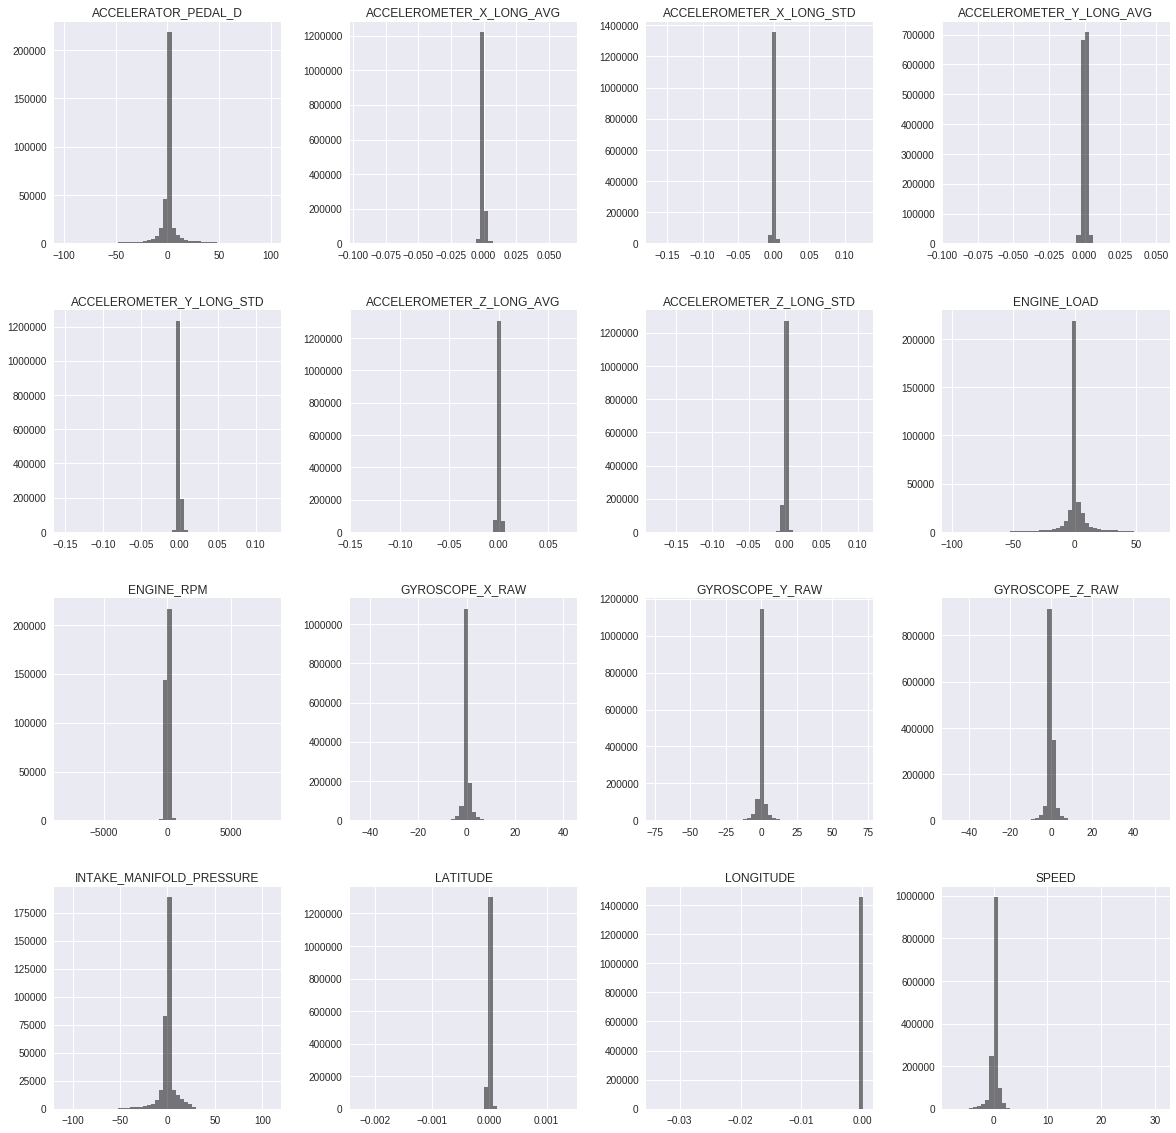

In [0]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50, figsize=(20,20))

LATITUDE                        AxesSubplot(0.125,0.71587;0.168478x0.16413)
LONGITUDE                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
ENGINE_RPM                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
ENGINE_LOAD                  AxesSubplot(0.731522,0.71587;0.168478x0.16413)
INTAKE_MANIFOLD_PRESSURE       AxesSubplot(0.125,0.518913;0.168478x0.16413)
ACCELERATOR_PEDAL_D         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
SPEED                       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
GYROSCOPE_X_RAW             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
GYROSCOPE_Y_RAW                AxesSubplot(0.125,0.321957;0.168478x0.16413)
GYROSCOPE_Z_RAW             AxesSubplot(0.327174,0.321957;0.168478x0.16413)
ACCELEROMETER_X_LONG_AVG    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ACCELEROMETER_Y_LONG_AVG    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
ACCELEROMETER_Z_LONG_AVG          AxesSubplot(0.125,0.125;0.168478x0.16413)
ACCELEROMETE

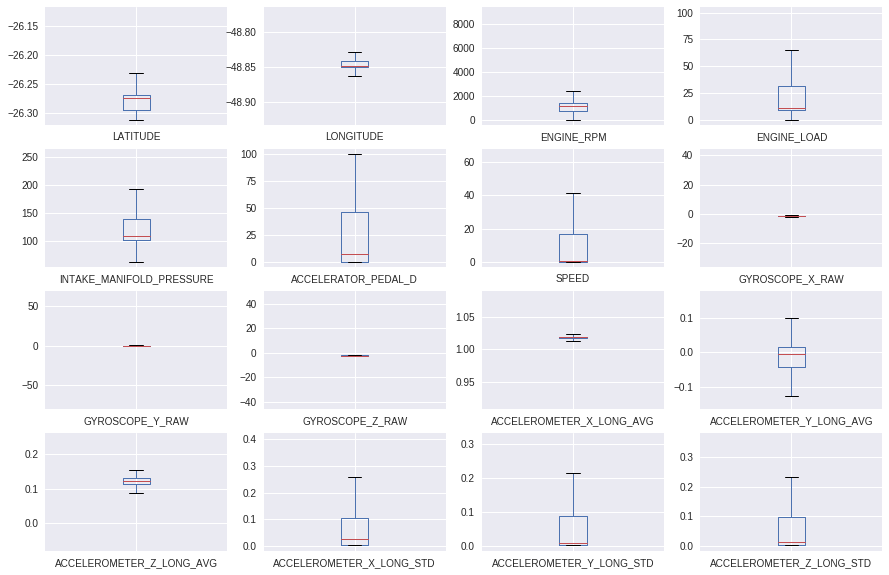

In [0]:
df_new = df.drop("DATE_TIME", axis=1)
df_new.plot(subplots = True, kind = 'box', layout = (4,4), figsize = (15,10))

In [0]:
df.to_pickle("./df.pkl")